In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pprint import pprint

from ufc import load_data

In [18]:
pd.set_option('display.max_columns', 70)

In [5]:
df = load_data.read_prepped_data()

#### General inspection

In [19]:
df.head()

,event_date,fighter1,fighter2,outcome,weight_class,fighter1_height,fighter1_curr_weight,fighter1_dob,fighter1_reach,fighter1_stance,fighter1_sig_strikes_landed_pm,fighter1_sig_strikes_accuracy,fighter1_sig_strikes_absorbed_pm,fighter1_sig_strikes_defended,fighter1_takedown_avg_per15m,fighter1_takedown_accuracy,fighter1_takedown_defence,fighter1_submission_avg_attempted_per15m,fighter2_height,fighter2_curr_weight,fighter2_dob,fighter2_reach,fighter2_stance,fighter2_sig_strikes_landed_pm,fighter2_sig_strikes_accuracy,fighter2_sig_strikes_absorbed_pm,fighter2_sig_strikes_defended,fighter2_takedown_avg_per15m,fighter2_takedown_accuracy,fighter2_takedown_defence,fighter2_submission_avg_attempted_per15m,fighter1_age,fighter2_age,delta_height,delta_age,delta_reach,delta_sig_strikes_landed_pm,delta_sig_strikes_accuracy,delta_sig_strikes_absorbed_pm,delta_sig_strikes_defended,delta_takedown_avg_per15m,delta_takedown_accuracy,delta_takedown_defence,delta_submission_avg_attempted_per15m,ratio_height,ratio_age,ratio_reach,ratio_sig_strikes_landed_pm,ratio_sig_strikes_accuracy,ratio_sig_strikes_absorbed_pm,ratio_sig_strikes_defended,ratio_takedown_avg_per15m,ratio_takedown_accuracy,ratio_takedown_defence,ratio_submission_avg_attempted_per15m
0,2023-09-16,Jack Della Maddalena,Kevin Holland,fighter1,Welterweight,180.34,77.11064,1996-09-10,185.42,Switch,7.20,0.53,4.83,0.67,0.27,0.20,0.82,0.3,190.50,77.11064,1992-11-05,205.74,Orthodox,4.39,0.49,3.22,0.51,0.78,0.38,0.53,0.5,27,31,-10.16,-4,-20.32,2.81,0.04,1.61,0.16,-0.51,-0.18,0.29,-0.2,0.946667,0.870968,0.901235,1.640091,1.081633,1.500000,1.313725,0.346154,0.526316,1.547170,0.600000
1,2023-09-16,Raul Rosas Jr.,Terrence Mitchell,fighter1,Bantamweight,175.26,61.23492,2004-10-08,170.18,Switch,1.28,0.44,1.52,0.46,3.57,0.33,0.00,1.8,177.80,61.23492,1989-12-30,187.96,Orthodox,2.21,0.34,8.85,0.41,3.69,0.50,0.00,0.0,19,34,-2.54,-15,-17.78,-0.93,0.10,-7.33,0.05,-0.12,-0.17,0.00,1.8,0.985714,0.558824,0.905405,0.579186,1.294118,0.171751,1.121951,0.967480,0.660000,NaN,inf
2,2023-09-16,Christos Giagos,Daniel Zellhuber,fighter2,Lightweight,177.80,70.30676,1990-01-23,180.34,Orthodox,2.98,0.42,2.95,0.51,2.93,0.37,0.52,0.4,185.42,70.30676,1999-07-07,195.58,Switch,5.26,0.39,4.79,0.53,0.28,0.33,0.94,0.3,33,24,-7.62,9,-15.24,-2.28,0.03,-1.84,-0.02,2.65,0.04,-0.42,0.1,0.958904,1.375000,0.922078,0.566540,1.076923,0.615866,0.962264,10.464286,1.121212,0.553191,1.333333
3,2023-09-16,Fernando Padilla,Kyle Nelson,fighter2,Featherweight,185.42,65.77084,1996-12-15,193.04,Orthodox,5.51,0.38,5.81,0.53,0.00,0.00,1.00,0.0,180.34,65.77084,1991-04-20,180.34,Switch,3.46,0.44,4.56,0.52,1.15,0.20,0.73,0.7,27,32,5.08,-5,12.70,2.05,-0.06,1.25,0.01,-1.15,-0.20,0.27,-0.7,1.028169,0.843750,1.070423,1.592486,0.863636,1.274123,1.019231,0.000000,0.000000,1.369863,0.000000
4,2023-09-16,Elise Reed,Loopy Godinez,fighter2,Women's Strawweight,160.02,52.16308,1992-12-05,160.02,Orthodox,2.66,0.49,3.06,0.52,0.58,0.60,0.42,0.0,157.48,52.16308,1993-09-06,154.94,Orthodox,4.03,0.50,3.52,0.62,3.82,0.47,0.82,1.3,31,30,2.54,1,5.08,-1.37,-0.01,-0.46,-0.10,-3.24,0.13,-0.40,-1.3,1.016129,1.033333,1.032787,0.660050,0.980000,0.869318,0.838710,0.151832,1.276596,0.512195,0.000000


In [40]:
df.columns

Index(['event_date', 'fighter1', 'fighter2', 'outcome', 'weight_class',
       'fighter1_height', 'fighter1_curr_weight', 'fighter1_dob',
       'fighter1_reach', 'fighter1_stance', 'fighter1_sig_strikes_landed_pm',
       'fighter1_sig_strikes_accuracy', 'fighter1_sig_strikes_absorbed_pm',
       'fighter1_sig_strikes_defended', 'fighter1_takedown_avg_per15m',
       'fighter1_takedown_accuracy', 'fighter1_takedown_defence',
       'fighter1_submission_avg_attempted_per15m', 'fighter2_height',
       'fighter2_curr_weight', 'fighter2_dob', 'fighter2_reach',
       'fighter2_stance', 'fighter2_sig_strikes_landed_pm',
       'fighter2_sig_strikes_accuracy', 'fighter2_sig_strikes_absorbed_pm',
       'fighter2_sig_strikes_defended', 'fighter2_takedown_avg_per15m',
       'fighter2_takedown_accuracy', 'fighter2_takedown_defence',
       'fighter2_submission_avg_attempted_per15m', 'fighter1_age',
       'fighter2_age', 'delta_height', 'delta_age', 'delta_reach',
       'delta_sig_strikes_l

In [8]:
df.shape

(3193, 55)

In [9]:
df.dtypes

event_date                                   object
fighter1                                     object
fighter2                                     object
outcome                                      object
weight_class                                 object
fighter1_height                             float64
fighter1_curr_weight                        float64
fighter1_dob                                 object
fighter1_reach                              float64
fighter1_stance                              object
fighter1_sig_strikes_landed_pm              float64
fighter1_sig_strikes_accuracy               float64
fighter1_sig_strikes_absorbed_pm            float64
fighter1_sig_strikes_defended               float64
fighter1_takedown_avg_per15m                float64
fighter1_takedown_accuracy                  float64
fighter1_takedown_defence                   float64
fighter1_submission_avg_attempted_per15m    float64
fighter2_height                             float64
fighter2_cur

#### Missing value, odd values checks
Ratio cols have some funny values but we're not using this so that's fine

In [20]:
pprint(df.describe())

       fighter1_height  fighter1_curr_weight  fighter1_reach  \
count      3193.000000            3193.00000     3193.000000   
mean        177.299637              73.20489      181.990642   
std           9.319237              16.22013       11.457777   
min         152.400000              52.16308      147.320000   
25%         170.180000              61.23492      172.720000   
50%         177.800000              70.30676      182.880000   
75%         185.420000              83.91452      190.500000   
max         210.820000             120.20188      213.360000   

       fighter1_sig_strikes_landed_pm  fighter1_sig_strikes_accuracy  \
count                     3193.000000                    3193.000000   
mean                         3.893633                       0.459142   
std                          1.325073                       0.072686   
min                          0.000000                       0.000000   
25%                          3.020000                       0.4

#### Check for over/under-representation


In [38]:
def check_representation(data, col):
    df = data.copy()

    return (
        df
        .groupby(col)
        .agg(
            count = ("outcome", "count"),
            pct = ("outcome", lambda x: x.count()/len(df))
        )
    )

In [34]:
check_representation(df, "outcome")

,count,pct
outcome,,
fighter1,1584,0.496085
fighter2,1609,0.503915


In [39]:
check_representation(df, ["weight_class", "outcome"])

count       pct
weight_class          outcome                  
Bantamweight          fighter1    169  0.052928
                      fighter2    180  0.056373
Catch Weight          fighter1     15  0.004698
                      fighter2     26  0.008143
Featherweight         fighter1    183  0.057313
                      fighter2    191  0.059818
Flyweight             fighter1     85  0.026621
                      fighter2     83  0.025994
Heavyweight           fighter1    111  0.034764
                      fighter2    137  0.042906
Light Heavyweight     fighter1    120  0.037582
                      fighter2    130  0.040714
Lightweight           fighter1    226  0.070780
                      fighter2    205  0.064203
Middleweight          fighter1    207  0.064829
                      fighter2    141  0.044159
Welterweight          fighter1    203  0.063577
                      fighter2    244  0.076417
Women's Bantamweight  fighter1     50  0.015659
                      fighter2     58  0.018165
Women's Featherweight fighter1     17  0.005324
                      fighter2     10  0.003132
Women's Flyweight     fighter1     92  0.028813
                      fighter2    106  0.033198
Women's Strawweight   fighter1    106  0.033198
                      fighter2     98  0.030692

#### Correlation
No strong intercorrelation to worry about or linear relationships. Expected strong relationships have correlation of ~0.2

In [53]:
df_corr = df[[
    'outcome',
    'delta_height', 'delta_age', 'delta_reach',
    'delta_sig_strikes_landed_pm', 'delta_sig_strikes_accuracy',
    'delta_sig_strikes_absorbed_pm', 'delta_sig_strikes_defended',
    'delta_takedown_avg_per15m', 'delta_takedown_accuracy',
    'delta_takedown_defence', 'delta_submission_avg_attempted_per15m'
]]

df_corr["outcome"] = df_corr["outcome"].map({"fighter1": 1, "fighter2": 0})

df_corr = df_corr.corr()

C:\Users\janse\AppData\Local\Temp\ipykernel_4116\1283925523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["outcome"] = df_corr["outcome"].map({"fighter1": 1, "fighter2": 0})


In [54]:
df_corr

,outcome,delta_height,delta_age,delta_reach,delta_sig_strikes_landed_pm,delta_sig_strikes_accuracy,delta_sig_strikes_absorbed_pm,delta_sig_strikes_defended,delta_takedown_avg_per15m,delta_takedown_accuracy,delta_takedown_defence,delta_submission_avg_attempted_per15m
outcome,1.000000,0.045319,-0.175841,0.045679,0.214084,0.236787,-0.198845,0.185971,0.131763,0.131490,0.160747,0.098277
delta_height,0.045319,1.000000,-0.121318,0.598382,0.096738,0.052520,-0.031847,-0.105688,-0.138221,0.017733,-0.049971,0.105100
delta_age,-0.175841,-0.121318,1.000000,-0.087712,-0.183720,-0.109076,-0.010254,0.088500,-0.071030,-0.047226,-0.014061,-0.082098
delta_reach,0.045679,0.598382,-0.087712,1.000000,0.050417,-0.032053,-0.044219,-0.128600,-0.084014,0.035288,-0.039633,0.027876
delta_sig_strikes_landed_pm,0.214084,0.096738,-0.183720,0.050417,1.000000,0.337115,0.275003,0.222121,-0.168714,0.032049,0.293992,-0.109422
delta_sig_strikes_accuracy,0.236787,0.052520,-0.109076,-0.032053,0.337115,1.000000,-0.250818,0.171657,0.185511,0.254554,0.154680,0.152659
delta_sig_strikes_absorbed_pm,-0.198845,-0.031847,-0.010254,-0.044219,0.275003,-0.250818,1.000000,-0.347123,-0.307046,-0.191853,-0.007569,-0.166261
delta_sig_strikes_defended,0.185971,-0.105688,0.088500,-0.128600,0.222121,0.171657,-0.347123,1.000000,0.020050,0.115910,0.286105,-0.104030
delta_takedown_avg_per15m,0.131763,-0.138221,-0.071030,-0.084014,-0.168714,0.185511,-0.307046,0.020050,1.000000,0.384783,0.035116,0.247470
delta_takedown_accuracy,0.131490,0.017733,-0.047226,0.035288,0.032049,0.254554,-0.191853,0.115910,0.384783,1.000000,0.201508,0.107324


<Axes: >

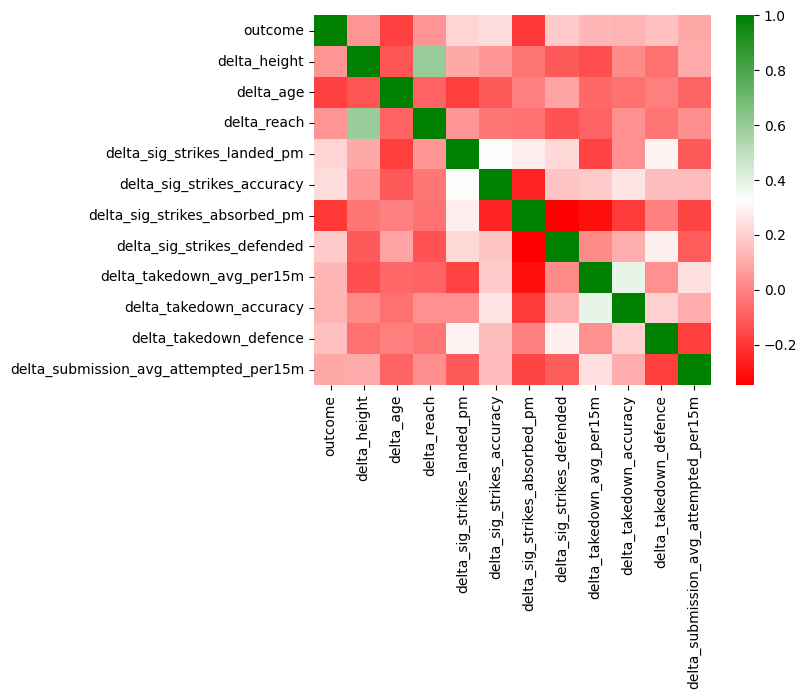

In [55]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

sns.heatmap(df_corr, cmap=cmap)